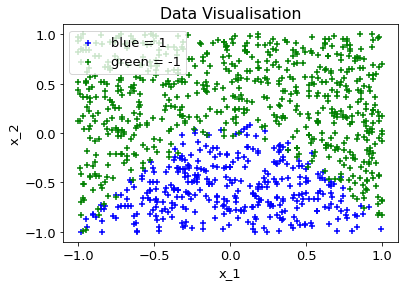

In [1]:
import numpy as np
import math
from matplotlib import cm
import pandas as pd
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as matlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

df = pd.read_csv('week2.csv')
df.columns = ["X1","X2","y"]
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]
df.isnull();

plt.rc('font', size =13)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Data Visualisation")
plt.scatter(X[y > 0, 0], X[y > 0, 1], marker = "+",c='b')
plt.scatter(X[y < 0, 0], X[y < 0, 1], marker = "+", c='g')
plt.legend(["blue = 1","green = -1"], fancybox = True, loc= "upper left")

In [2]:
#ii)
model = LogisticRegression(penalty="none", solver='lbfgs').fit(X,y)

Text(0, 0.5, 'X2')

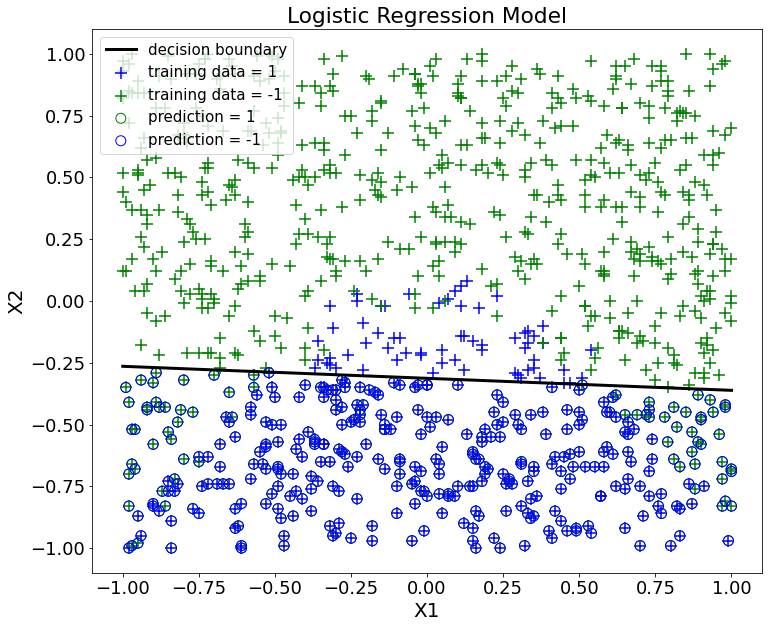

In [3]:
#iii)
line_x = np.array([-1,1])
line_y = -1*model.coef_[0,0]/model.coef_[0,1] * line_x + -model.intercept_ / model.coef_[0,1]

plt.figure(figsize=(12,10), dpi=72)
plt.rcParams.update({'font.size': 18})
plt.plot(line_x,line_y, linewidth =3, color = "black")
plt.scatter(X[y > 0, 0], X[y > 0, 1], marker = "+", s=150,c='b')
plt.scatter(X[y < 0, 0], X[y < 0, 1], marker = "+",s=150,c='g')
X_pred = X[np.where(model.predict(X) == -1)]
X_pred = X[np.where(model.predict(X) == 1)]
plt.scatter(X_pred[:, 0], X_pred[:, 1], marker='o', facecolor='none', edgecolor='g', s=100, label="Prediction y = -1")
plt.scatter(X_pred[:, 0], X_pred[:, 1], marker='o', facecolor='none', edgecolor='b',s=100, label="Prediction y = 1")
plt.legend(["decision boundary","training data = 1","training data = -1","prediction = 1","prediction = -1"], loc = "upper left", fontsize = 15)
plt.title("Logistic Regression Model")
plt.xlabel("X1", fontsize=20)
plt.ylabel("X2", fontsize=20)


[-0.19742489498712806, -0.02899231357624136, -0.48004855030201865]


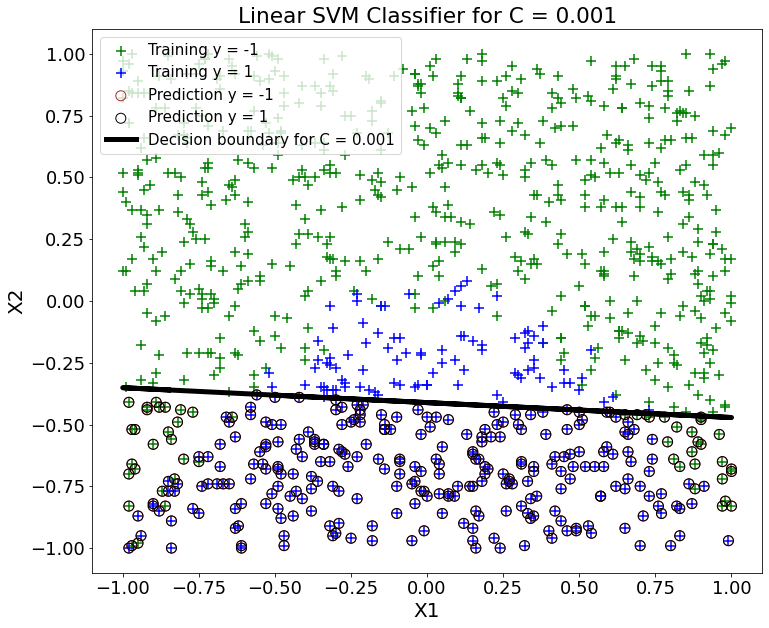

[-0.5573135716048533, -0.0840887502648442, -1.82889284848416]


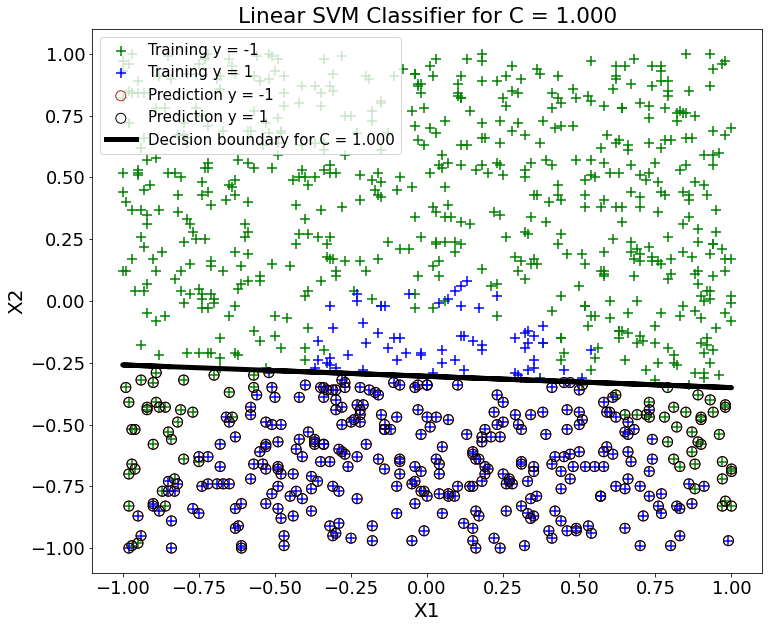

[-0.5414306083402468, -0.03995772500670655, -1.8432866017271694]


C:\Users\Cormac\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


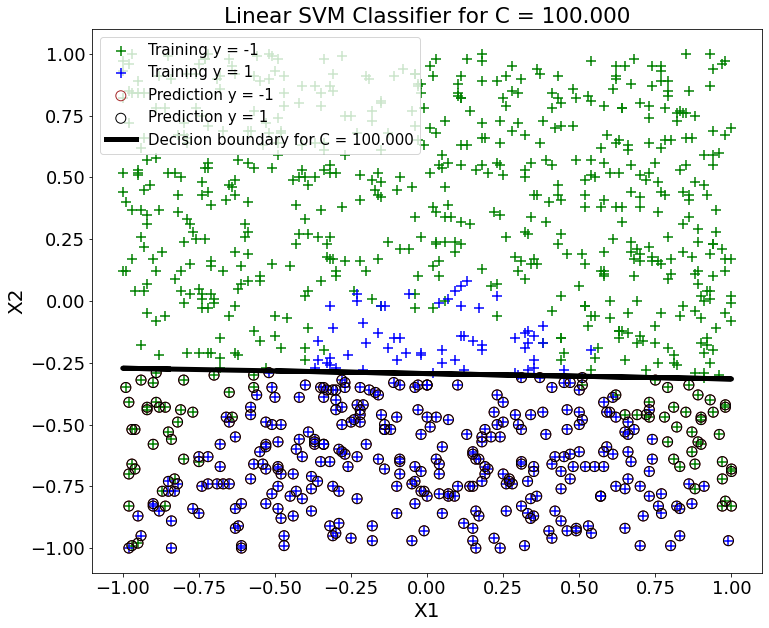

C:\Users\Cormac\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[-0.6351933773875988, 0.09617547669115153, -2.480364252415655]


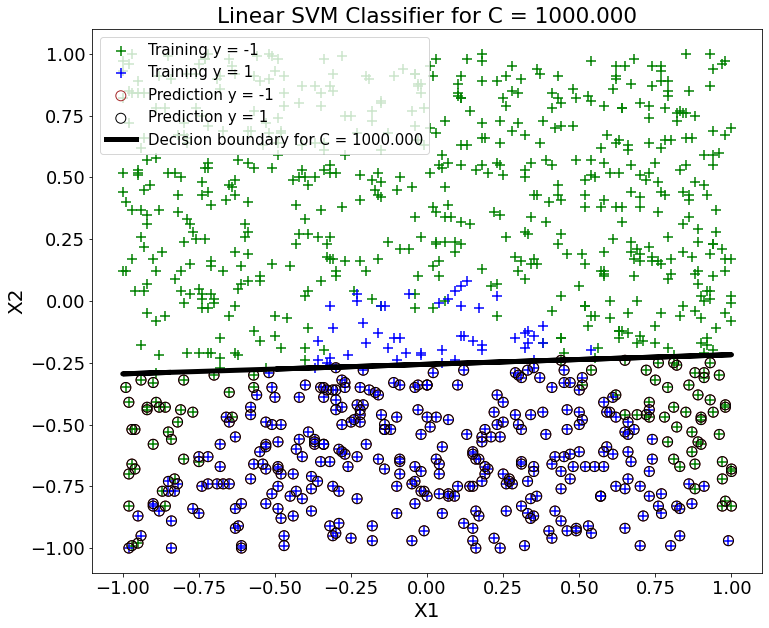

In [4]:
# (b)(i)
X_m1 = X[np.where(y == -1)]
X_p1 = X[np.where(y == 1)]

C = [0.001, 1, 100, 1000]

for Ci in C:
    modelSVC = LinearSVC(C=Ci).fit(X, y)
    theta = [modelSVC.intercept_[0], modelSVC.coef_[0][0], modelSVC.coef_[0][1]]
    print (theta)
    
    plt.figure(figsize=(12,10))
    plt.rcParams.update({'font.size': 18})

    # Training data
    plt.scatter(X_m1[:, 0], X_m1[:, 1], c='g', marker='+', s=100, label="Training y = -1")
    plt.scatter(X_p1[:, 0], X_p1[:, 1], c='b', marker='+', s=100, label="Training y = 1")

    # Predictions
    X_pred = X[np.where(modelSVC.predict(X) == -1)]
    X_pred = X[np.where(modelSVC.predict(X) == 1)]
    plt.scatter(X_pred[:, 0], X_pred[:, 1], marker='o', facecolor='none', edgecolor='brown', s=100, label="Prediction y = -1")
    plt.scatter(X_pred[:, 0], X_pred[:, 1], marker='o', facecolor='none', edgecolor='black', s=100, label="Prediction y = 1")

    # Decision boundary
    plt.plot(X1, -1/theta[2] * (theta[0] + theta[1]*X1), linewidth=5, c='black', label="Decision boundary for C = %.3f"%Ci)
    
    plt.legend(scatterpoints=1, fontsize=15,loc = "upper left")
    plt.title("Linear SVM Classifier for C = %.3f"%Ci)
    plt.xlabel("X1", fontsize=20)
    plt.ylabel("X2", fontsize=20)
    plt.show()

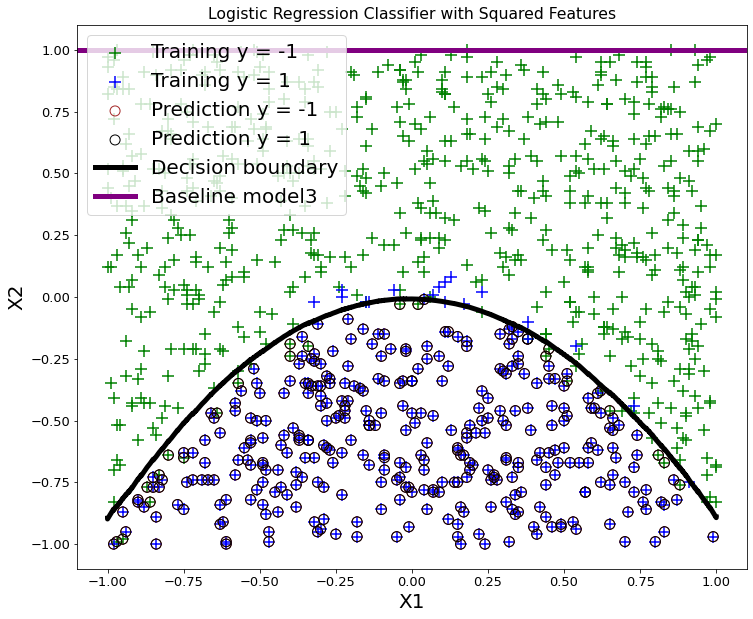

In [5]:
#(c)(i)
# Additional features
X3 = X1**2
X4 = X2**2
X = np.column_stack((X1,X2,X3,X4))
model3 = LogisticRegression().fit(X, y)

#(c)(ii)
plt.figure(figsize=(12,10), dpi=72)
plt.rcParams.update({'font.size': 13})

# Training
plt.scatter(X_m1[:, 0], X_m1[:, 1], c='g', marker='+', s=150, label="Training y = -1")
plt.scatter(X_p1[:, 0], X_p1[:, 1], c='b', marker='+', s=150, label="Training y = 1")

# Predictions
X_pred = X[np.where(model3.predict(X) == -1)]
X_pred = X[np.where(model3.predict(X) == 1)]
plt.scatter(X_pred[:, 0], X_pred[:, 1], marker='o', facecolor='none', edgecolor='brown', s=100, label="Prediction y = -1")
plt.scatter(X_pred[:, 0], X_pred[:, 1], marker='o', facecolor='none', edgecolor='black', s=100, label="Prediction y = 1")

# Baseline
(values,counts) = np.unique(y, return_counts=True)
mostCommonValue = values[np.argmax(counts)]

# (c)(iv)
# Decision boundary
X1_sorted = np.sort(X1)
X2_sorted = np.sort(X2)
a = -model3.coef_[0][2]/model3.coef_[0][1]
b = -model3.coef_[0][0]/model3.coef_[0][1]
c = -model3.intercept_[0]/model3.coef_[0][1] - model3.coef_[0][3] / model3.coef_[0][1] * np.power(X2_sorted, 2)
boundary = a * np.power(X1_sorted, 2) + b * X1_sorted + c

plt.plot(X1_sorted, boundary, linewidth=5, c='black', label="Decision boundary")
plt.axhline(-mostCommonValue, c='purple', linewidth=5, label='Baseline model3')
plt.legend(scatterpoints=1, fontsize=20, loc = "upper left")
plt.title("Logistic Regression Classifier with Squared Features")
plt.xlabel("X1", fontsize=20)
plt.ylabel("X2", fontsize=20)
plt.show()